In [1]:
#Import libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lets import and visualize the training data
train = pd.read_csv('train_hotel.csv')
train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [3]:
#Although it's clearly visible but lets us get more idea about the data type of training data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [4]:
#Lets check the shape of training data
train.shape

(38932, 5)

In [5]:
#Lets see if there is any missing value in training data
train.isnull().sum()
#Great to see no missing values

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

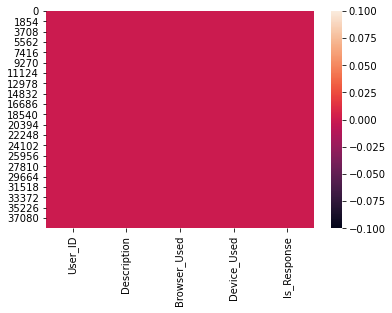

In [6]:
#Lets see the missing values with help of heatmap
sns.heatmap(train.isnull())
#again great to see no missing values

In [7]:
#Lets drop the unneccesary columns in training data
train.drop(['User_ID', 'Browser_Used', 'Device_Used'],axis=1,inplace=True)

In [8]:
#Lets visualize the training data again
train.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [9]:
#Lets visualize the test data
test = pd.read_csv('test_hotel.csv')
test.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


In [10]:
#Lets drop the unneccesary columns in test data
test.drop(['User_ID', 'Browser_Used', 'Device_Used'],axis=1,inplace=True)

In [11]:
#Lets visualize the test data again
test.head()

,Description
0,Looking for a motel in close proximity to TV t...
1,Walking distance to Madison Square Garden and ...
2,Visited Seattle on business. Spent - nights in...
3,This hotel location is excellent and the rooms...
4,This hotel is awesome I love the service Antho...


# Exploratory Data Analysis of Train data

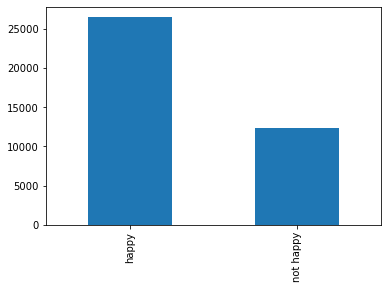

In [12]:
#Lets see if the training data is balanced or not
train['Is_Response'].value_counts().plot.bar()
# we can see that the dataset is imbalanced

In [13]:
#Lets check the normalized counts
train['Is_Response'].value_counts(normalize=True)
# data set is imbalanced and mostly having positive reviews

happy        0.681213
not happy    0.318787
Name: Is_Response, dtype: float64

In [14]:
# Let's get the length of the messages in training data
train['review_length'] = train['Description'].apply(len)

In [15]:
#Lets visualize the train data again
train.head()

,Description,Is_Response,review_length
0,The room was kind of clean but had a VERY stro...,not happy,248
1,I stayed at the Crown Plaza April -- - April -...,not happy,1077
2,I booked this hotel through Hotwire at the low...,not happy,1327
3,Stayed here with husband and sons on the way t...,happy,502
4,My girlfriends and I stayed here to celebrate ...,not happy,1613


In [16]:
#Lets see the descriptive statistics of train data
train.describe()

,review_length
count,38932.000000
mean,866.276482
std,719.255343
min,20.000000
25%,405.000000
50%,676.000000
75%,1095.000000
max,14340.000000


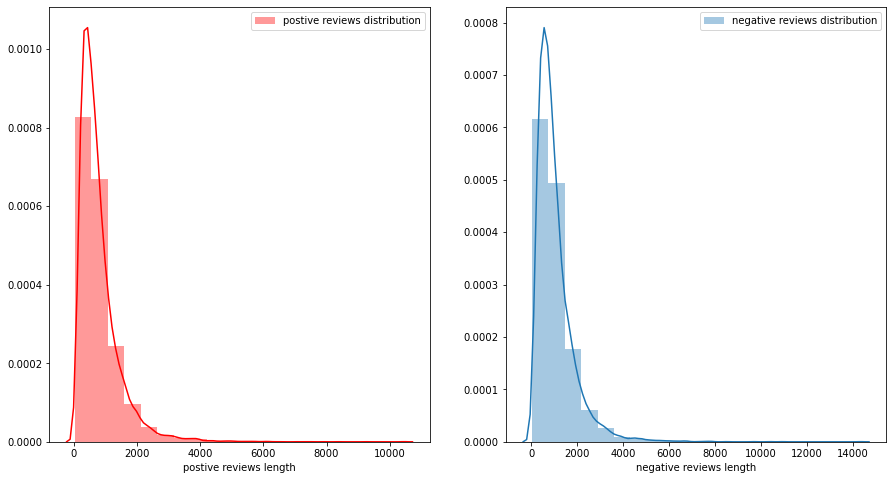

In [17]:
# review distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['Is_Response']=='happy']['review_length'],bins=20,ax=ax[0],label='postive reviews distribution',color='r')

ax[0].set_xlabel('postive reviews length')
ax[0].legend()

sns.distplot(train[train['Is_Response']=='not happy']['review_length'],bins=20,ax=ax[1],label='negative reviews distribution')
ax[1].set_xlabel('negative reviews length')
ax[1].legend()

plt.show()

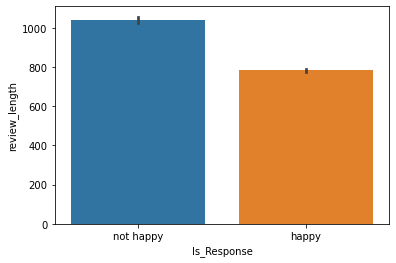

In [18]:
#Lets visualize the relationship between review length and Is_response
sns.barplot(x=train['Is_Response'], y =train['review_length'] )
#we can see that average length of negative reviews are more then positive reviews

# DATA CLEANING

In [19]:
import string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer


In [20]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    

In [21]:
# Let us create a function for cleaning the text data
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)



In [22]:
#Lets test our custom function
mytest = 'hi my name is 123@, why are @#$ you running here and eating'

In [23]:
clean_text(mytest)

'hi name run eat'

In [24]:
# clean text data
train["cleaned_desc"] = train["Description"].apply(lambda x: clean_text(x))

In [25]:
#Lets check our data frame
train.head()

,Description,Is_Response,review_length,cleaned_desc
0,The room was kind of clean but had a VERY stro...,not happy,248,room kind clean strong smell dog generally ave...
1,I stayed at the Crown Plaza April -- - April -...,not happy,1077,stay crown plaza april april staff friendly at...
2,I booked this hotel through Hotwire at the low...,not happy,1327,booked hotel hotwire low price could find got ...
3,Stayed here with husband and sons on the way t...,happy,502,stayed husband son way alaska cruise love hote...
4,My girlfriends and I stayed here to celebrate ...,not happy,1613,girlfriend stay celebrate th birthday plan wee...


In [26]:
#Let us check the length of reviews after cleaning the data
# Let's get the length of the messages in training data
train['clean_review_length'] = train['cleaned_desc'].apply(len)

In [27]:
#Lets check lenght of reviews before and after our cleaning
train[['review_length','clean_review_length']].head(10)

,review_length,clean_review_length
0,248,134
1,1077,621
2,1327,774
3,502,320
4,1613,903
5,610,340
6,492,244
7,935,587
8,639,411
9,358,260


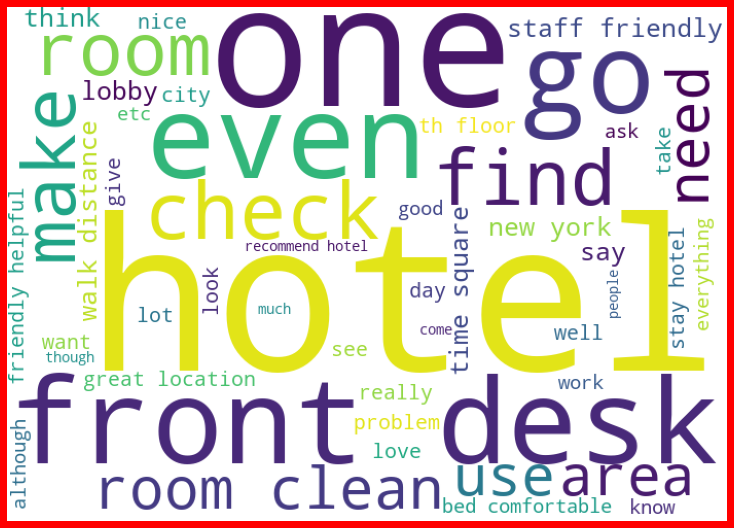

In [28]:
#Let' explore the most frequent words in postive reviews in training data with word cloud
from wordcloud import WordCloud


happy = train['cleaned_desc'][train['Is_Response']=='happy']

happy_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(happy))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(happy_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

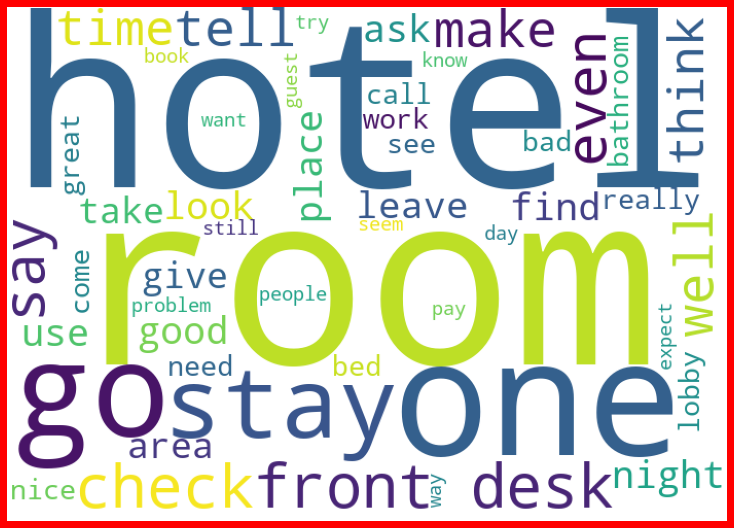

In [29]:
#Let' explore the most frequent words in negative reviews in training data with word cloud
not_happy = train['cleaned_desc'][train['Is_Response']=='not happy']

not_happy_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(not_happy))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(not_happy_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [30]:
#As machines understand  only numeric data we need to convert our training data into numeric
#Here our feature is cleaned_desc and target is Is_Response

In [31]:
#Lets encode the target variable Is_Response in train data

In [32]:
#Label coding 0 and 1
train['Is_Response'].replace({'happy':0,'not happy':1},inplace=True)

In [33]:
#Lets  check the training data
train.head()
# good to see that our target variable has been converted in numeric data

,Description,Is_Response,review_length,cleaned_desc,clean_review_length
0,The room was kind of clean but had a VERY stro...,1,248,room kind clean strong smell dog generally ave...,134
1,I stayed at the Crown Plaza April -- - April -...,1,1077,stay crown plaza april april staff friendly at...,621
2,I booked this hotel through Hotwire at the low...,1,1327,booked hotel hotwire low price could find got ...,774
3,Stayed here with husband and sons on the way t...,0,502,stayed husband son way alaska cruise love hote...,320
4,My girlfriends and I stayed here to celebrate ...,1,1613,girlfriend stay celebrate th birthday plan wee...,903


# Conversion of  featureText - cleaned_desc into Vectors

In [34]:
#  Convert  training text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer()

feature = tf_vec.fit_transform(train['cleaned_desc'])

target = train['Is_Response']

# Checking the performance of Different Models on training data

In [35]:
#Lets see which of the algorithims performs well on the given data
# A good way to check their performance is  k fold cross validation
#Lets import the algorithims/models to be evaluated  AND OTHER REQUIRED LIBRARIES
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score

In [36]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=5)))
models.append(('NB', MultinomialNB()))
models.append(('SVM', SVC()))


In [37]:
#AS THE DATASET IS NOT BALANCED WE WILL USE F1 Score as Metric

In [38]:
#Let us check which model will perform well on the given data on the basis of mean  kfold crossval score and its std dev
results = []
names = []
for name, model in models: 
    kfold = KFold(n_splits=5, random_state=1) 
    cv_results = cross_val_score(model, feature, target, cv=kfold, scoring='f1') 
    results.append(cv_results.mean()) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.803109 (0.004677)
KNN: 0.605508 (0.011125)
CART: 0.594502 (0.005372)
NB: 0.574292 (0.012986)
SVM: 0.806073 (0.003927)


In [39]:
#Lets see the comparision on basis of mean f1 score
Comparisonc = pd.DataFrame({'ModelName':names,'mean_f1_score': results})
Comparisonc.sort_values(by='mean_f1_score', ascending=False)

,ModelName,mean_f1_score
4,SVM,0.806073
0,LR,0.803109
1,KNN,0.605508
2,CART,0.594502
3,NB,0.574292


In [40]:
#we can see that top performing models are SVM and Logistic Regression which are very close in performance
#We can use any of these two models
#We will use Logistic Regression to build our classifier as its a simple model and very close in performance to SVM

In [41]:
#Lets also calculate the  k-fold cross validation accuracy of Logistic regression
my_mod = LogisticRegression()
cv_results = cross_val_score(my_mod, feature, target, cv=kfold, scoring='accuracy')
print('mean kfold cross val accuracy of logistic regression = ', cv_results.mean())

mean kfold cross val accuracy of logistic regression =  0.8814601360768082


# Training of Logistic Regression Model

In [42]:
#Lets train our  logistic regression model
log = LogisticRegression()
log.fit(feature,target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# CLEANING OF TEST DATA

In [43]:
test.head()

,Description
0,Looking for a motel in close proximity to TV t...
1,Walking distance to Madison Square Garden and ...
2,Visited Seattle on business. Spent - nights in...
3,This hotel location is excellent and the rooms...
4,This hotel is awesome I love the service Antho...


In [44]:
test["cleaned_desc"] = test["Description"].apply(lambda x: clean_text(x))

In [45]:
#Let us see the test data again
test.head()

,Description,cleaned_desc
0,Looking for a motel in close proximity to TV t...,look motel close proximity tv tap dr phil show...
1,Walking distance to Madison Square Garden and ...,walk distance madison square garden penn subwa...
2,Visited Seattle on business. Spent - nights in...,visit seattle business spend night vintage par...
3,This hotel location is excellent and the rooms...,hotel location excellent room clean suite one ...
4,This hotel is awesome I love the service Antho...,hotel awesome love service anthony really grea...


In [46]:
#convert text data into vectors using TF-IDF
#We have to transform the test data to  vectors using the same vectorizer instance used for training data

X_test = tf_vec.transform(test["cleaned_desc"])


# Predicting the Sentiments of test data

In [47]:
#Lets predict the sentiments for test data
Y_Predicted= log.predict(X_test)

In [48]:
#Lets see Y_Predicted
print(Y_Predicted)

[1 0 0 ... 0 0 0]


In [49]:
#Lets take a sample to test our prediction
test['Description'][0]

"Looking for a motel in close proximity to TV taping of a Dr. Phil show, we chose the Dunes on Sunset Blvd in West Hollywood. Although the property displayed the AAA emblem, it certainly left a lot to be desired. There were chips & scrapes on the bottom of the door frame in the bathroom and the lotion containers were half full--apparently not replaced by housekeeping. We needed an early wakeup call, but couldn't use the clock radio alarm as there wasn't a radio in the room. There was no TV channel listing on the remote, or on the TV menu making viewing a chore.The TV remote had to be returned when checking-out. This place served its purpose, but not a place to revisit."

In [50]:
#Reading the above sentiment we can say it is negative sentiment
#Lets see what our model predict
Y_Predicted[0]

1

In [51]:
#Remember earlier we encoded the values as 0 : happy  and 1 means not happy
#And our model also predicted correct for taken sample   

In [52]:
#Let us create a dataframe from these predicted sentiments

In [53]:
predicted_sentiments = pd.DataFrame(Y_Predicted, columns=['Sentiment'])

In [54]:
#Let us add original reviews named as description in test data to this data frame

In [55]:
predicted_sentiments['Description'] = test['Description']

In [56]:
predicted_sentiments.head()

,Sentiment,Description
0,1,Looking for a motel in close proximity to TV t...
1,0,Walking distance to Madison Square Garden and ...
2,0,Visited Seattle on business. Spent - nights in...
3,1,This hotel location is excellent and the rooms...
4,0,This hotel is awesome I love the service Antho...


In [57]:
#Lets us save this data a csv file
predicted_sentiments.to_csv('hotel_sentiments.csv')

In [58]:
# Lets save the model 
import pickle
SAVED_MODEL = open('saved_model.sav','wb')
pickle.dump(log,SAVED_MODEL)
SAVED_MODEL.close()